lifestyle data analysis


In [1]:
import pandas as pd
import numpy as np

#load data sets
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        df = pd.read_csv(file_path, encoding ='utf-8')
        print(df.head(10))
        return df
    
    except FileNotFoundError:
        print("The specified file was not found.")
        return None

def clean_data(df):
 """clean the dataframe by handling missung values and duplicates."""
 if df is not None:
     df = df.drop_duplicates()
     df = df.dropna()
     return df
 return None
 
file_path= r"D:\datascience\DS-project-1\Final_data.csv"
data = load_data(file_path)
cleaned_data = clean_data(data)

print(data.info())

data['Workout_Type'].unique()

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   
5  53.19  Female       105.05        1.84   176.52   130.60        61.84   
6  23.17    Male        58.41        1.78   184.75   140.90        58.01   
7  55.92  Female        84.07        1.63   183.87   141.12        51.79   
8  24.11  Female        88.58        1.79   176.78   154.07        65.19   
9  39.19  Female        50.32        1.60   166.88   128.04        49.91   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37    

array(['Strength', 'HIIT', 'Cardio', 'Yoga'], dtype=object)

In [2]:
#identifying categorical columns
categorical_cols = cleaned_data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type',
       'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'Burns_Calories_Bin'],
      dtype='object')


In [3]:
#encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    cleaned_data[col] = le.fit_transform(cleaned_data[col])

print(cleaned_data.head())



     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91       1        65.27        1.62   188.58   157.65        69.05   
1  23.37       0        56.41        1.55   179.43   131.75        73.18   
2  33.20       0        58.98        1.67   175.04   123.95        54.96   
3  38.69       0        93.78        1.70   191.21   155.10        50.07   
4  45.09       1        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned  Workout_Type  ...  \
0                      1.00          1080.90             2  ...   
1                      1.37          1809.91             1  ...   
2                      0.91           802.26             0  ...   
3                      1.10          1450.79             1  ...   
4                      1.08          1166.40             2  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   


In [4]:
# Convert floats to float32
float_cols = cleaned_data.select_dtypes(include=['float64']).columns
cleaned_data[float_cols] = cleaned_data[float_cols].astype('float32')

#convert integers to int32
int_cols = cleaned_data.select_dtypes(include=['int64']).columns
cleaned_data[int_cols] = cleaned_data[int_cols].astype('int32')

In [5]:
data.columns

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

DATA VISUALIZATION

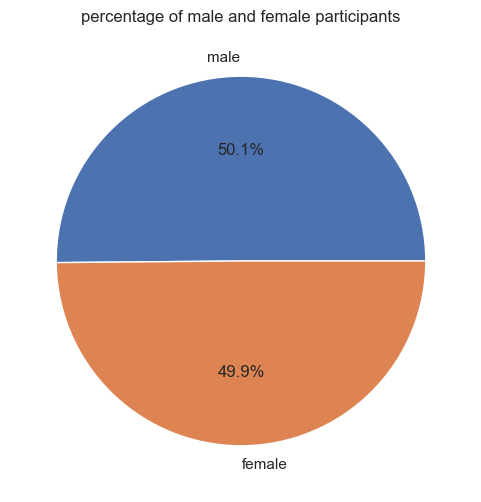

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

number_male_female = cleaned_data['Gender'].value_counts()
number_male_female

plt.figure(figsize=(6,6))
labels=['male','female']
plt.pie(x=number_male_female.values,labels=labels,autopct='%1.1f%%')
plt.title('percentage of male and female participants')
plt.show()



In [7]:
workout_types=cleaned_data.groupby(['Workout_Type','Gender']).agg(
    average_burned_calories=('Calories_Burned','mean'),
    gender_count=('Gender','value_counts')
)
workout_types

average_burned_calories  gender_count
Workout_Type Gender                                       
0            0                   1215.020752          2418
             1                   1208.189331          2505
1            0                   1645.911377          2479
             1                   1659.112671          2495
2            0                   1362.775024          2601
             1                   1360.014526          2470
3            0                    896.823547          2530
             1                    897.394104          2502

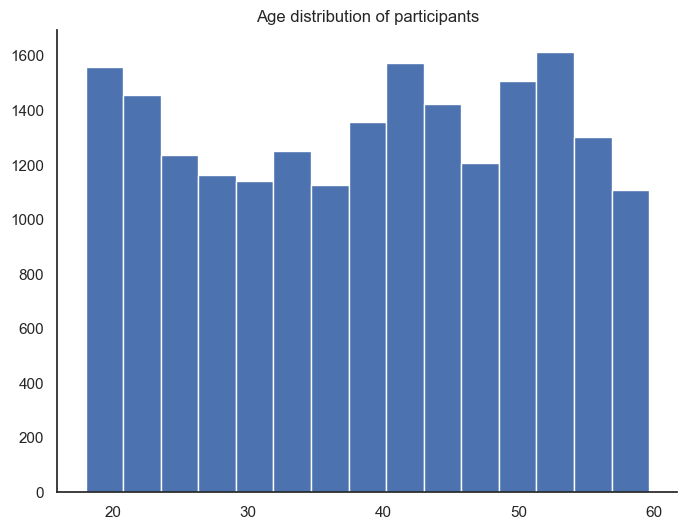

In [8]:
plt.figure(figsize=(8,6))
sns.set_style('white')
plt.hist(x= cleaned_data['Age'],bins=15)
plt.title('Age distribution of participants')
sns.despine()
plt.show()

In [9]:
# Check for infinite values
print("Columns with infinite values:")
print(cleaned_data.columns[np.isinf(cleaned_data).any()])
print("\nColumns with abnormally large values (> 1e10):")
for col in cleaned_data.select_dtypes(include=['number']).columns:
    if (cleaned_data[col].abs() > 1e10).any():
        print(col)

Columns with infinite values:
Index([], dtype='object')

Columns with abnormally large values (> 1e10):
Burns Calories (per 30 min)_bc


In [10]:
# Replace inf and -inf with NaN
cleaned_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
# Basic summaries
print("Shape:", cleaned_data.shape)
print(cleaned_data.describe(include='all').round(2).T)

# Value counts for categorical-ish columns
for col in cleaned_data.select_dtypes(include=['object','category']).columns:
    print("\nValue counts for:", col)
    print(cleaned_data[col].value_counts(dropna=False).head(20))

# Numeric missing & skew
num_cols = cleaned_data.select_dtypes(include=['int32','float32','int64','float64']).columns.tolist()
missing = cleaned_data[num_cols].isnull().sum()
skewness = cleaned_data[num_cols].skew().sort_values(ascending=False)
print("\nMissing numeric:\n", missing)
print("\nSkewness numeric (top):\n", skewness.head(10))

Shape: (20000, 54)
                                  count          mean     std           min  \
Age                             20000.0  3.885000e+01   12.11  1.800000e+01   
Gender                          20000.0  5.000000e-01    0.50  0.000000e+00   
Weight (kg)                     20000.0  7.390000e+01   21.17  3.918000e+01   
Height (m)                      20000.0  1.720000e+00    0.13  1.490000e+00   
Max_BPM                         20000.0  1.798900e+02   11.51  1.593100e+02   
Avg_BPM                         20000.0  1.437000e+02   14.27  1.190700e+02   
Resting_BPM                     20000.0  6.220000e+01    7.29  4.949000e+01   
Session_Duration (hours)        20000.0  1.260000e+00    0.34  4.900000e-01   
Calories_Burned                 20000.0  1.280110e+03  502.23  3.231100e+02   
Workout_Type                    20000.0  1.510000e+00    1.12  0.000000e+00   
Fat_Percentage                  20000.0  2.610000e+01    5.00  1.133000e+01   
Water_Intake (liters)           2

c:\python\Lib\site-packages\pandas\core\nanops.py:1025: RuntimeWarning: overflow encountered in cast
  result = result.astype(dtype, copy=False)


VISUALIZATION OF DISTRIBUTIONS AND RELATIONSHIP

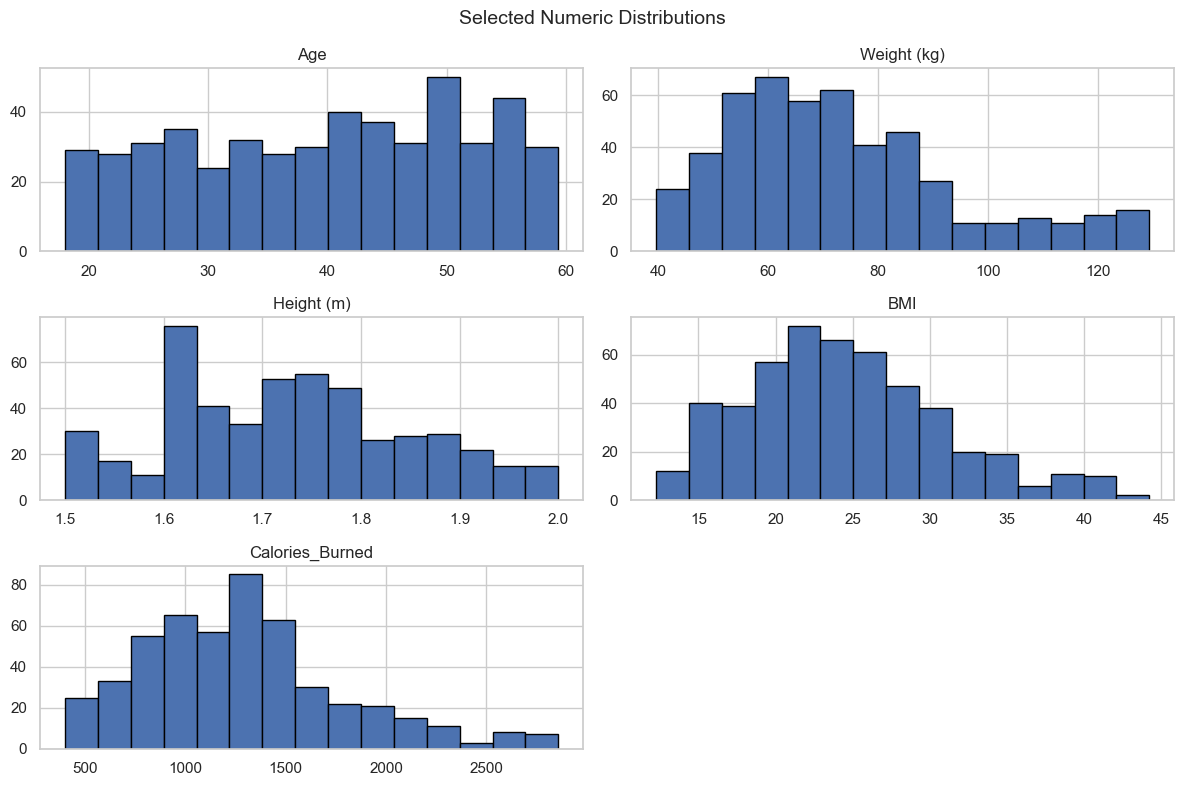

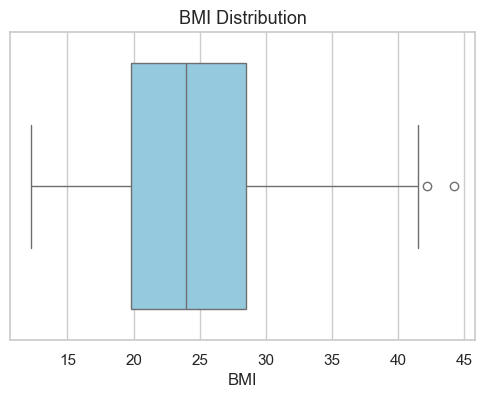

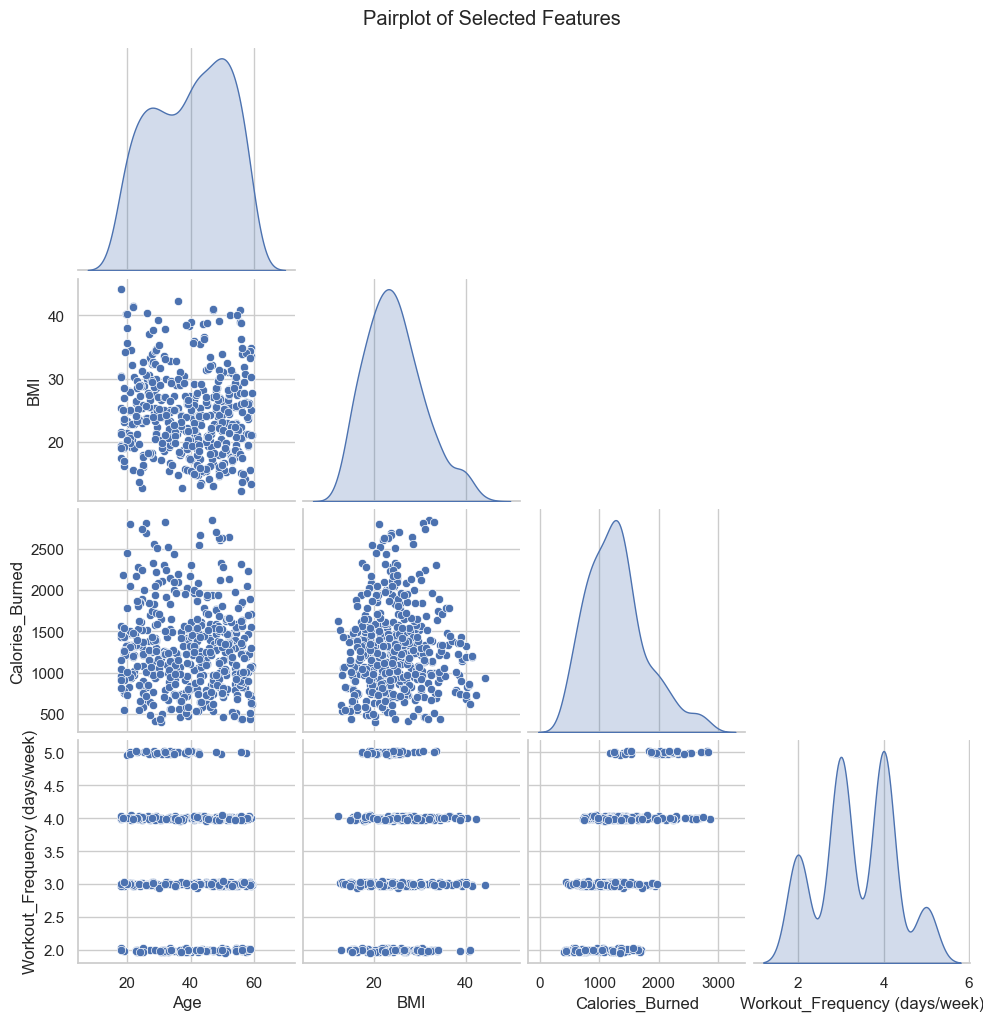

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18384\2779895426.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=sample_df, palette='pastel')


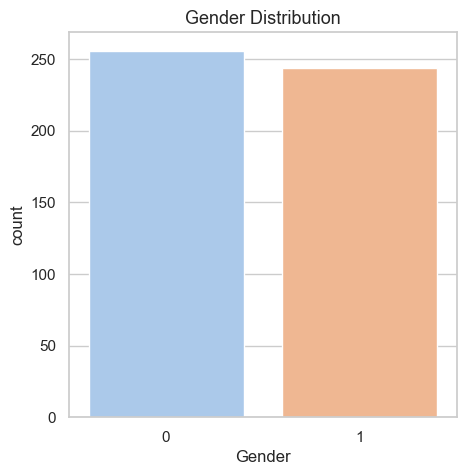

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18384\2779895426.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Workout_Type', y='BMI', data=sample_df, palette='muted')


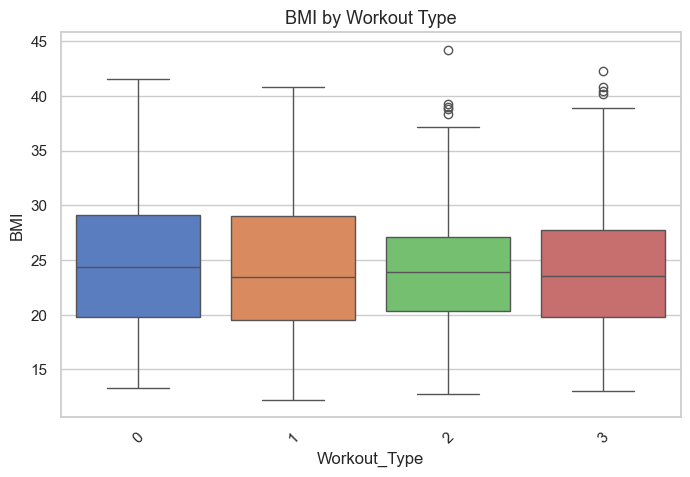

In [12]:
# Visualization of distributions and relationships
sns.set(style='whitegrid')

# Optional: pick a smaller random sample for faster, cleaner plots
sample_df = cleaned_data.sample(n=min(500, len(cleaned_data)), random_state=42)

# 1️ Histograms for selected numeric features
numeric_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Calories_Burned']  # choose only a few
numeric_cols = [c for c in numeric_cols if c in sample_df.columns]  # keep only existing ones

sample_df[numeric_cols].hist(bins=15, figsize=(12,8), edgecolor='black')
plt.suptitle('Selected Numeric Distributions', fontsize=14)
plt.tight_layout()
plt.show()

# 2️ Boxplot example (BMI)
if 'BMI' in sample_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=sample_df['BMI'], color='skyblue')
    plt.title('BMI Distribution', fontsize=13)
    plt.show()

# 3️ Pairplot (4–5 key variables only)
cols_for_pairs = [c for c in ['Age','BMI','Calories_Burned','Workout_Frequency (days/week)'] if c in sample_df.columns]
if len(cols_for_pairs) > 1:
    sns.pairplot(sample_df[cols_for_pairs], diag_kind='kde', corner=True)
    plt.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()

# 4️ Categorical counts (Gender)
if 'Gender' in sample_df.columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x='Gender', data=sample_df, palette='pastel')
    plt.title('Gender Distribution', fontsize=13)
    plt.show()

# 5️ Boxplot by category (BMI by Workout Type)
if {'BMI', 'Workout_Type'}.issubset(sample_df.columns):
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Workout_Type', y='BMI', data=sample_df, palette='muted')
    plt.title('BMI by Workout Type', fontsize=13)
    plt.xticks(rotation=45)
    plt.show()



CORRELATION AND REGRESSION 

In [13]:
# Enhanced numeric correlation matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(data, method='pearson', figsize=(14, 12), 
                          annot=True, cmap='coolwarm', title_suffix=""):
    """
    Plot correlation matrix for numeric columns with automatic filtering
    """
    # Select numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    
    # Filter columns
    numeric_cols = [
        c for c in numeric_cols
        if not data[c].isna().all() and data[c].nunique(dropna=True) > 1
    ]
    
    if len(numeric_cols) < 2:
        print(f"Not enough numeric columns with variation to compute correlation. Found {len(numeric_cols)} columns.")
        return None
    
    # Calculate correlation matrix
    correlation_data = data[numeric_cols]
    
    # Optional: handle missing values
    if correlation_data.isna().any().any():
        print("Warning: Data contains missing values. Using pairwise complete observations.")
        correlation_matrix = correlation_data.corr(method=method, min_periods=10)
    else:
        correlation_matrix = correlation_data.corr(method=method)
    
    if correlation_matrix.empty:
        print("Correlation matrix is empty.")
        return None
    
    # Round for cleaner annotations
    corr = correlation_matrix.round(2)
    
    # Mask upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Create plot
    plt.figure(figsize=figsize)
    sns.heatmap(corr, mask=mask, annot=annot, fmt=".2f", cmap=cmap,
                square=True, cbar_kws={"shrink": .8}, vmin=-1, vmax=1,
                center=0, linewidths=0.5, linecolor='white')
    
    # Enhanced title
    title = f"Correlation Matrix of Numeric Features ({method.capitalize()})"
    if title_suffix:
        title += f" - {title_suffix}"
    plt.title(title, fontsize=16, pad=20)
    
    # Adjust layout
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix





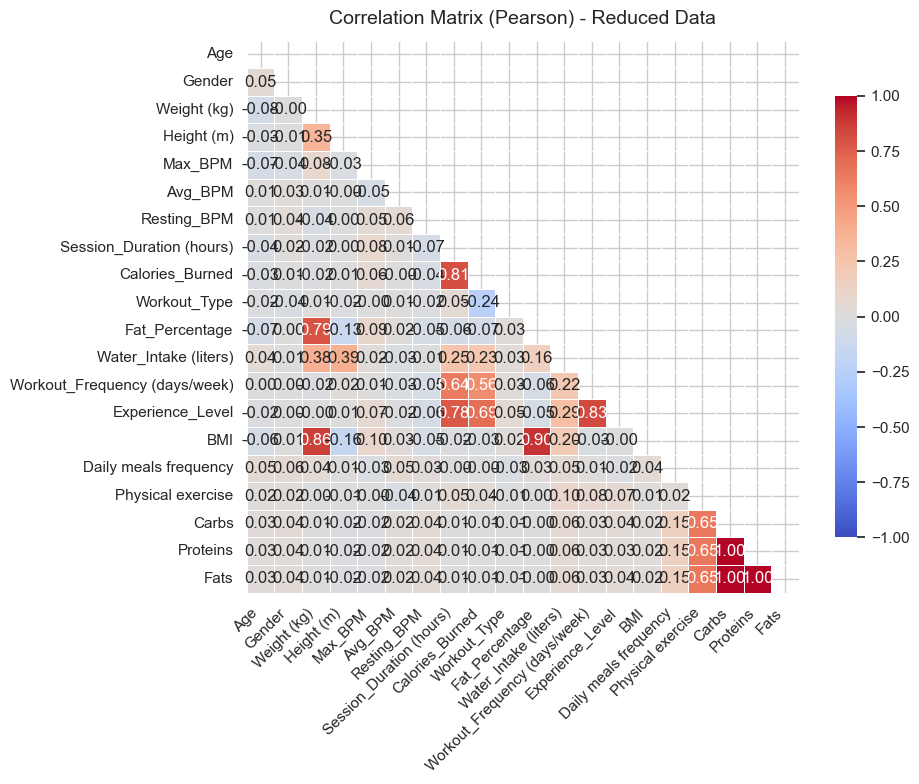


High-correlation pairs (|r| >= 0.8):
Weight (kg) <-> BMI: 0.86
Session_Duration (hours) <-> Calories_Burned: 0.81
Fat_Percentage <-> BMI: 0.90
Workout_Frequency (days/week) <-> Experience_Level: 0.83
Carbs <-> Proteins: 1.00
Carbs <-> Fats: 1.00
Proteins <-> Fats: 1.00

Saved: correlation_matrix.csv and correlation_heatmap.png


<Figure size 640x480 with 0 Axes>

In [14]:
# --- Imports ---
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper Functions ---
def get_high_correlation_pairs(corr_matrix, threshold=0.8):
    """Return list of (col1, col2, corr) for abs(corr) >= threshold (upper triangle only)."""
    pairs = []
    cols = corr_matrix.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            val = corr_matrix.iloc[i, j]
            if pd.notna(val) and abs(val) >= threshold:
                pairs.append((cols[i], cols[j], float(val)))
    return pairs


def plot_correlation_matrix(data, method='pearson', figsize=(12, 10),
                            annot=True, cmap='coolwarm', title_suffix=""):
    """Compute and plot correlation heatmap for numeric columns with basic filtering and diagnostics."""
    # select numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    # filter out all-NaN or constant columns
    numeric_cols = [c for c in numeric_cols if not data[c].isna().all() and data[c].nunique(dropna=True) > 1]

    if len(numeric_cols) < 2:
        print(f"Not enough numeric columns with variation to compute correlation (found {len(numeric_cols)}).")
        return None

    corr_df = data[numeric_cols].corr(method=method)
    if corr_df.empty:
        print("Correlation dataframe is empty.")
        return None

    corr = corr_df.round(2)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=figsize)
    sns.heatmap(corr, mask=mask, annot=annot, fmt=".2f", cmap=cmap,
                square=True, cbar_kws={"shrink": .8}, vmin=-1, vmax=1, linewidths=0.5)
    title = f"Correlation Matrix ({method.capitalize()})"
    if title_suffix:
        title += f" - {title_suffix}"
    plt.title(title, fontsize=14, pad=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return corr_df


# --- Data Reduction + Correlation Analysis ---
#  Make sure 'cleaned_data' is already loaded before running this

# 1️ Reduce rows to make plotting faster (e.g., first 2000 rows)
sampled_data = cleaned_data.sample(n=2000, random_state=42)

# 2️ Keep only top 20 numeric columns for clarity
numeric_cols = sampled_data.select_dtypes(include=[np.number]).columns[:20]
reduced_data = sampled_data[numeric_cols]

# 3️ Plot correlation heatmap
corr = plot_correlation_matrix(reduced_data, method='pearson', figsize=(10,8),
                               annot=True, cmap='coolwarm', title_suffix="Reduced Data")

# 4️ Find and display high-correlation pairs
if corr is not None:
    pairs = get_high_correlation_pairs(corr, threshold=0.8)
    if pairs:
        print("\nHigh-correlation pairs (|r| >= 0.8):")
        for a, b, v in pairs:
            print(f"{a} <-> {b}: {v:.2f}")
    else:
        print("\nNo high-correlation pairs found at threshold 0.8.")

    # 5️ Save outputs
    corr.to_csv(r"D:\datascience\DS-project-1\correlation_matrix.csv", index=True)
    plt.savefig(r"D:\datascience\DS-project-1\correlation_heatmap.png", bbox_inches='tight', dpi=150)
    print("\nSaved: correlation_matrix.csv and correlation_heatmap.png")

# ...existing code...

REGRESSION ANALYSIS: 

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

#feature selection for random forest regression based on correlation analysis
highly_correlated = {
    'Calories_Burned',
    'Experoence_Level',
    'Carbs',
    'Proteins',
    'Fat',
    'Workout_Frequency'
}
moderately_correlated = {
    'Height (m)',
    'Water_Intake (liters)',
    'Workout_Type'
}

selected_features = list(highly_correlated.union( moderately_correlated))

if 'cleaned_data'not in globals():
    print("cleaned_data not defined")
else:
    selected_features = [col for col in selected_features if col in cleaned_data.columns]
    print(f"\n Selected Features for Analysis: {len(selected_features)}")
    print(f"   Highly Correlated: {len([f for f in highly_correlated if f in selected_features])}")
    print(f"   Moderately Correlated: {len([f for f in moderately_correlated if f in selected_features])}")

if len(selected_features) == 0:
    print("No selected features found in cleaned_data.")
else:
    X = cleaned_data[selected_features].copy()

    #diagnostic checks
    missing_values = X.isnull().sum().sum()
    infinite_values = np.isinf(X.select_dtypes(include=[np.number])).sum().sum()
    print(f"\n Data Quality Check:")
    print(f"   Missing Values: {missing_values}")
    print(f"   Infinite Values: {infinite_values}")


  # Handle infinities and missing
    X = X.replace([np.inf, -np.inf], np.nan)
    if X.isnull().sum().sum() > 0:
        total_missing = X.isnull().sum().sum()
        print(f"   ⚠️ Filling {total_missing} missing values with median")
        X = X.fillna(X.median(numeric_only=True))


 Selected Features for Analysis: 6
   Highly Correlated: 3
   Moderately Correlated: 3

 Data Quality Check:
   Missing Values: 0
   Infinite Values: 0


DATA STANDARDIZATION

In [17]:
print("\n"+ "="*80)
print("DATA STANDARDIZATION")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index = X.index)

print("Features standardized (mean =0, std =1)")
print(f"\nStanderdized Stastistixcs:")
print(f"mean: {X_scaled.mean():.6f}")
print(f"std: {X_scaled.std():.6f}")



DATA STANDARDIZATION
Features standardized (mean =0, std =1)

Standerdized Stastistixcs:
mean: 0.000000
std: 1.000000


OPTIMAL CLUSTER DETERMINATION

In [18]:
print("\n" + "="*80)
print("DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("="*80)

# Test range of clusters
K_range = range(2, 11)
metrics = {
    'inertia': [],
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print(f"\n🔍 Testing {len(K_range)} different cluster counts...\n")
print(f"{'k':<5} {'Inertia':<12} {'Silhouette':<12} {'Davies-Bouldin':<15} {'Calinski':<12}")
print("-" * 60)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X_scaled)
    
    metrics['inertia'].append(kmeans.inertia_)
    metrics['silhouette'].append(silhouette_score(X_scaled, labels))
    metrics['davies_bouldin'].append(davies_bouldin_score(X_scaled, labels))
    metrics['calinski_harabasz'].append(calinski_harabasz_score(X_scaled, labels))
    
    print(f"{k:<5} {kmeans.inertia_:<12.2f} {metrics['silhouette'][-1]:<12.4f} "
          f"{metrics['davies_bouldin'][-1]:<15.4f} {metrics['calinski_harabasz'][-1]:<12.2f}")

# Determine optimal k using multiple criteria
optimal_k_silhouette = K_range[np.argmax(metrics['silhouette'])]
optimal_k_db = K_range[np.argmin(metrics['davies_bouldin'])]
optimal_k_ch = K_range[np.argmax(metrics['calinski_harabasz'])]

# Calculate elbow using rate of change
inertia_diffs = np.diff(metrics['inertia'])
inertia_rates = np.diff(inertia_diffs)
optimal_k_elbow = K_range[np.argmax(inertia_rates) + 2] if len(inertia_rates) > 0 else 3

print(f"\n✅ Optimal Clusters by Different Methods:")
print(f"   Silhouette Score: k = {optimal_k_silhouette}")
print(f"   Davies-Bouldin Index: k = {optimal_k_db}")
print(f"   Calinski-Harabasz: k = {optimal_k_ch}")
print(f"   Elbow Method: k = {optimal_k_elbow}")

# Use silhouette score as primary criterion
optimal_k = optimal_k_silhouette
print(f"\n🎯 Selected Optimal k = {optimal_k} (based on Silhouette Score)")


DETERMINING OPTIMAL NUMBER OF CLUSTERS

🔍 Testing 9 different cluster counts...

k     Inertia      Silhouette   Davies-Bouldin  Calinski    
------------------------------------------------------------
2     93755.50     0.2068       1.7705          5597.94     
3     78733.66     0.1931       1.6117          5240.48     
4     69077.35     0.1876       1.4576          4913.58     
5     63178.76     0.1864       1.4553          4495.76     
6     58463.38     0.1828       1.5445          4209.04     
7     54128.72     0.1863       1.4639          4055.06     
8     50229.50     0.1904       1.3579          3967.09     
9     47208.43     0.1890       1.3667          3853.07     
10    45132.56     0.1889       1.3718          3684.46     

✅ Optimal Clusters by Different Methods:
   Silhouette Score: k = 2
   Davies-Bouldin Index: k = 8
   Calinski-Harabasz: k = 2
   Elbow Method: k = 4

🎯 Selected Optimal k = 2 (based on Silhouette Score)


K-MEANS CLUSTERING

In [19]:
print("\n" + "="*80)
print(f"K-MEANS CLUSTERING WITH k={optimal_k}")
print("="*80)

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
clusters = kmeans_final.fit_predict(X_scaled)

# Clustering quality metrics
sil_score = silhouette_score(X_scaled, clusters)
db_score = davies_bouldin_score(X_scaled, clusters)
ch_score = calinski_harabasz_score(X_scaled, clusters)

print(f"\n📊 Clustering Quality Metrics:")
print(f"   Silhouette Score: {sil_score:.4f} (range: -1 to 1, higher is better)")
print(f"   Davies-Bouldin Index: {db_score:.4f} (lower is better)")
print(f"   Calinski-Harabasz Score: {ch_score:.2f} (higher is better)")
print(f"   Inertia: {kmeans_final.inertia_:.2f}")

# Cluster distribution
cluster_counts = pd.Series(clusters).value_counts().sort_index()
print(f"\n📈 Cluster Distribution:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(clusters)) * 100
    bar = '█' * int(percentage / 2)
    print(f"   Cluster {cluster_id}: {count:>6,} samples ({percentage:>5.1f}%) {bar}")

# Add clusters to original data
cleaned_data['Cluster'] = clusters
X['Cluster'] = clusters


K-MEANS CLUSTERING WITH k=2

📊 Clustering Quality Metrics:
   Silhouette Score: 0.2068 (range: -1 to 1, higher is better)
   Davies-Bouldin Index: 1.7705 (lower is better)
   Calinski-Harabasz Score: 5597.94 (higher is better)
   Inertia: 93755.50

📈 Cluster Distribution:
   Cluster 0: 12,450 samples ( 62.3%) ███████████████████████████████
   Cluster 1:  7,550 samples ( 37.8%) ██████████████████


CLUSTER PROFILING

In [20]:
print("\n" + "="*80)
print("DETAILED CLUSTER PROFILING")
print("="*80)

# Calculate cluster statistics
cluster_profiles = X.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])
cluster_means = X.groupby('Cluster').mean()
overall_means = X.drop('Cluster', axis=1).mean()

print("\n📊 Cluster Mean Values:")
print(cluster_means.round(2))

# Identify distinguishing characteristics
print("\n" + "="*80)
print("CLUSTER CHARACTERISTICS (Compared to Overall Average)")
print("="*80)

for cluster_id in range(optimal_k):
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} - {cluster_counts[cluster_id]:,} samples ({cluster_counts[cluster_id]/len(clusters)*100:.1f}%)")
    print(f"{'='*80}")
    
    cluster_mean = cluster_means.loc[cluster_id]
    differences = ((cluster_mean - overall_means) / overall_means * 100).sort_values(ascending=False)
    
    # Significantly higher features
    high_features = differences[differences > 10]
    if len(high_features) > 0:
        print(f"\n   ⬆️  SIGNIFICANTLY HIGHER than average:")
        for feat, diff in high_features.items():
            actual_val = cluster_mean[feat]
            avg_val = overall_means[feat]
            print(f"      • {feat:<35} {actual_val:>8.2f} vs {avg_val:>8.2f} ({diff:>+6.1f}%)")
    
    # Significantly lower features
    low_features = differences[differences < -10]
    if len(low_features) > 0:
        print(f"\n   ⬇️  SIGNIFICANTLY LOWER than average:")
        for feat, diff in low_features.items():
            actual_val = cluster_mean[feat]
            avg_val = overall_means[feat]
            print(f"      • {feat:<35} {actual_val:>8.2f} vs {avg_val:>8.2f} ({diff:>+6.1f}%)")
    
    # Around average features
    avg_features = differences[(differences >= -10) & (differences <= 10)]
    if len(avg_features) > 0:
        print(f"\n   ≈  AROUND AVERAGE:")
        for feat, diff in avg_features.items():
            actual_val = cluster_mean[feat]
            print(f"      • {feat:<35} {actual_val:>8.2f} ({diff:>+6.1f}%)")
print("\n" + "="*80)
print("End of Cluster Profiling")


DETAILED CLUSTER PROFILING

📊 Cluster Mean Values:
              Carbs  Workout_Type  Height (m)  Water_Intake (liters)  \
Cluster                                                                
0        215.050003          1.51        1.72                   2.62   
1        307.049988          1.51        1.73                   2.64   

           Proteins  Calories_Burned  
Cluster                               
0         86.029999      1285.189941  
1        122.820000      1271.719971  

CLUSTER CHARACTERISTICS (Compared to Overall Average)

CLUSTER 0 - 12,450 samples (62.3%)

   ⬇️  SIGNIFICANTLY LOWER than average:
      • Proteins                               86.03 vs    99.92 ( -13.9%)
      • Carbs                                 215.05 vs   249.78 ( -13.9%)

   ≈  AROUND AVERAGE:
      • Calories_Burned                      1285.19 (  +0.4%)
      • Workout_Type                            1.51 (  +0.0%)
      • Height (m)                              1.72 (  -0.3%)
      • 

PRINCIPAL COMPONENT ANALYSIS

In [21]:
print("\n" + "="*80)
print("PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("="*80)

# Full PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print(f"\n📊 Explained Variance by Principal Components:")
print(f"\n{'PC':<5} {'Variance':<12} {'Cumulative':<12}")
print("-" * 35)
for i in range(min(len(explained_var), 8)):
    print(f"PC{i+1:<3} {explained_var[i]:>10.4f}  {cumulative_var[i]:>10.4f}")

n_components_90 = np.argmax(cumulative_var >= 0.90) + 1
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1

print(f"\n✅ Components needed:")
print(f"   90% variance: {n_components_90} components")
print(f"   95% variance: {n_components_95} components")

# 2D PCA for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n📈 2D PCA Captures: {sum(pca_2d.explained_variance_ratio_):.2%} of total variance")

# Feature loadings
loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns[:-1]  # Exclude 'Cluster' column
).round(3)

print(f"\n🎯 Feature Contributions to Principal Components:")
print(loadings)

# Top contributors
print(f"\n📌 Top Contributors:")
print(f"   PC1: {loadings['PC1'].abs().nlargest(3).to_dict()}")
print(f"   PC2: {loadings['PC2'].abs().nlargest(3).to_dict()}")


PRINCIPAL COMPONENT ANALYSIS (PCA)

📊 Explained Variance by Principal Components:

PC    Variance     Cumulative  
-----------------------------------
PC1       0.3345      0.3345
PC2       0.2515      0.5860
PC3       0.2015      0.7874
PC4       0.1291      0.9166
PC5       0.0834      0.9999
PC6       0.0001      1.0000

✅ Components needed:
   90% variance: 4 components
   95% variance: 5 components

📈 2D PCA Captures: 58.60% of total variance

🎯 Feature Contributions to Principal Components:
                         PC1    PC2
Carbs                  0.703 -0.076
Workout_Type          -0.006 -0.280
Height (m)             0.049  0.509
Water_Intake (liters)  0.094  0.642
Proteins               0.702 -0.077
Calories_Burned        0.043  0.489

📌 Top Contributors:
   PC1: {'Carbs': 0.703, 'Proteins': 0.702, 'Water_Intake (liters)': 0.094}
   PC2: {'Water_Intake (liters)': 0.642, 'Height (m)': 0.509, 'Calories_Burned': 0.489}


HIERARCHICAL CLUSTERIN 

In [22]:
print("\n" + "="*80)
print("HIERARCHICAL CLUSTERING ANALYSIS")
print("="*80)

# Use sample for large datasets
sample_size = min(500, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

print(f"\n🔍 Computing hierarchical clustering on sample of {sample_size} observations...")
linkage_matrix = linkage(X_sample, method='ward')

# Cut dendrogram at optimal_k clusters
hier_clusters_sample = fcluster(linkage_matrix, optimal_k, criterion='maxclust')
hier_sil = silhouette_score(X_sample, hier_clusters_sample)

print(f"\n📊 Hierarchical Clustering Quality:")
print(f"   Silhouette Score: {hier_sil:.4f}")
print(f"   Method: Ward linkage")


HIERARCHICAL CLUSTERING ANALYSIS

🔍 Computing hierarchical clustering on sample of 500 observations...

📊 Hierarchical Clustering Quality:
   Silhouette Score: 0.1512
   Method: Ward linkage


VISUALIZATION


GENERATING COMPREHENSIVE VISUALIZATIONS

✅ Comprehensive visualization saved to:
   D:\datascience\DS-project-1\unsupervised_clustering_analysis.png


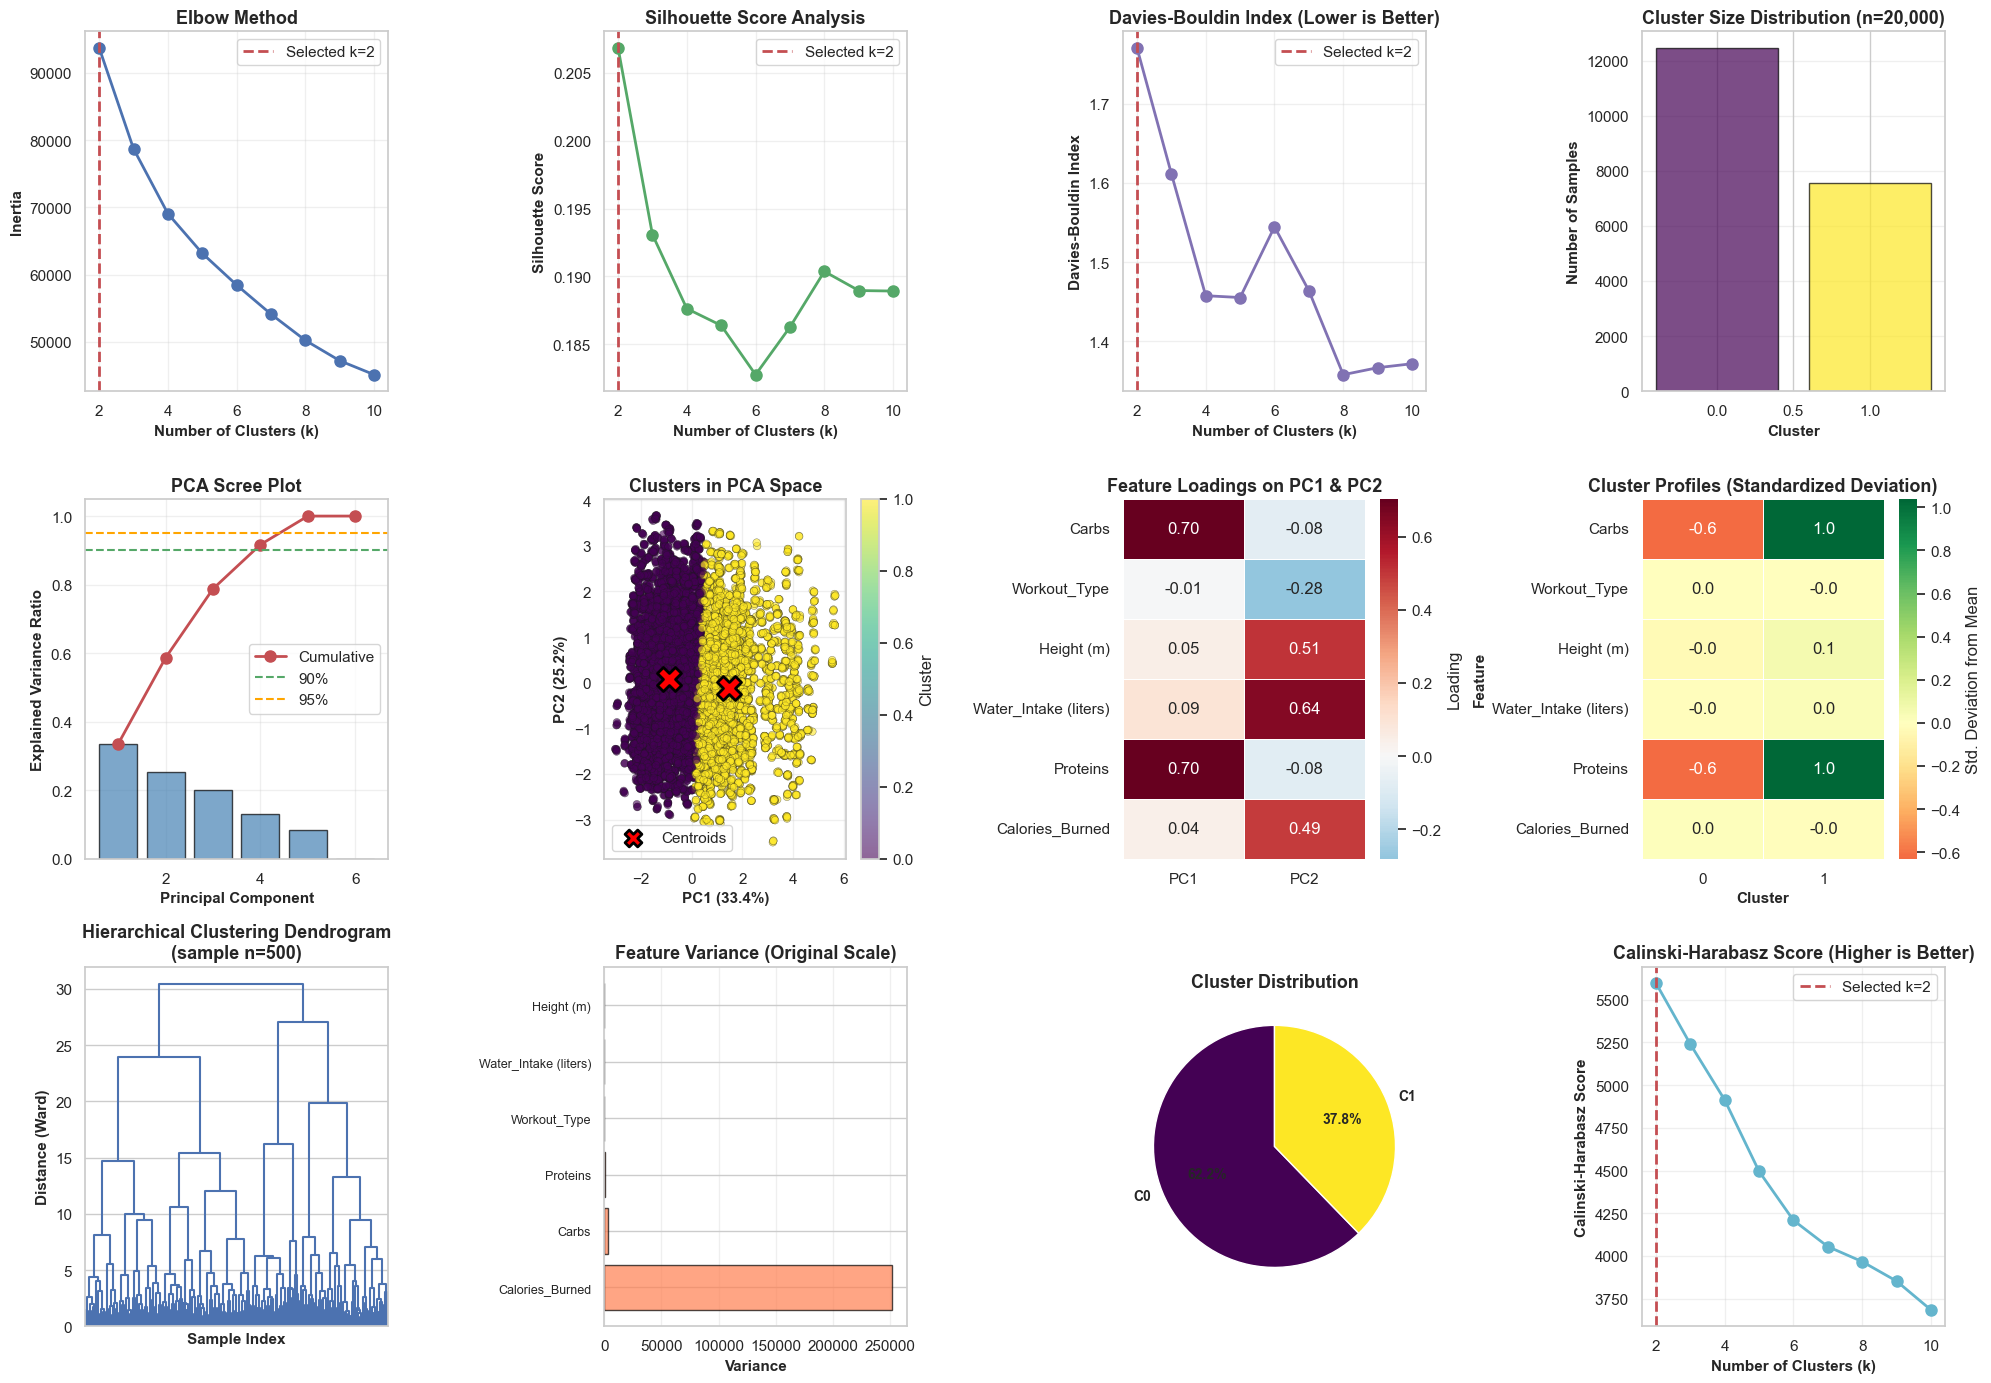

In [23]:
print("\n" + "="*80)
print("GENERATING COMPREHENSIVE VISUALIZATIONS")
print("="*80)

fig = plt.figure(figsize=(20, 14))

# 1. Elbow Method
ax1 = plt.subplot(3, 4, 1)
ax1.plot(K_range, metrics['inertia'], 'bo-', linewidth=2, markersize=8)
ax1.axvline(x=optimal_k, color='r', linestyle='--', linewidth=2, label=f'Selected k={optimal_k}')
ax1.set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Inertia', fontsize=11, fontweight='bold')
ax1.set_title('Elbow Method', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Silhouette Scores
ax2 = plt.subplot(3, 4, 2)
ax2.plot(K_range, metrics['silhouette'], 'go-', linewidth=2, markersize=8)
ax2.axvline(x=optimal_k, color='r', linestyle='--', linewidth=2, label=f'Selected k={optimal_k}')
ax2.set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
ax2.set_title('Silhouette Score Analysis', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Davies-Bouldin Index
ax3 = plt.subplot(3, 4, 3)
ax3.plot(K_range, metrics['davies_bouldin'], 'mo-', linewidth=2, markersize=8)
ax3.axvline(x=optimal_k, color='r', linestyle='--', linewidth=2, label=f'Selected k={optimal_k}')
ax3.set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Davies-Bouldin Index', fontsize=11, fontweight='bold')
ax3.set_title('Davies-Bouldin Index (Lower is Better)', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Cluster Distribution
ax4 = plt.subplot(3, 4, 4)
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))
ax4.bar(cluster_counts.index, cluster_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax4.set_ylabel('Number of Samples', fontsize=11, fontweight='bold')
ax4.set_title(f'Cluster Size Distribution (n={len(clusters):,})', fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# 5. PCA Scree Plot
ax5 = plt.subplot(3, 4, 5)
ax5.bar(range(1, len(explained_var[:10])+1), explained_var[:10], alpha=0.7, color='steelblue', edgecolor='black')
ax5.plot(range(1, len(cumulative_var[:10])+1), cumulative_var[:10], 'ro-', linewidth=2, markersize=8, label='Cumulative')
ax5.axhline(y=0.90, color='g', linestyle='--', linewidth=1.5, label='90%')
ax5.axhline(y=0.95, color='orange', linestyle='--', linewidth=1.5, label='95%')
ax5.set_xlabel('Principal Component', fontsize=11, fontweight='bold')
ax5.set_ylabel('Explained Variance Ratio', fontsize=11, fontweight='bold')
ax5.set_title('PCA Scree Plot', fontsize=13, fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# 6. Clusters in PCA Space
ax6 = plt.subplot(3, 4, 6)
scatter = ax6.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters, cmap='viridis',
                      alpha=0.6, s=30, edgecolors='k', linewidth=0.3)
centroids_2d = pca_2d.transform(kmeans_final.cluster_centers_)
ax6.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X',
           s=300, edgecolors='black', linewidth=2, label='Centroids', zorder=5)
ax6.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})', fontsize=11, fontweight='bold')
ax6.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})', fontsize=11, fontweight='bold')
ax6.set_title('Clusters in PCA Space', fontsize=13, fontweight='bold')
ax6.legend(markerscale=0.7)
ax6.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax6, label='Cluster')

# 7. PCA Loadings Heatmap
ax7 = plt.subplot(3, 4, 7)
sns.heatmap(loadings, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
           cbar_kws={'label': 'Loading'}, ax=ax7, linewidths=0.5)
ax7.set_title('Feature Loadings on PC1 & PC2', fontsize=13, fontweight='bold')
ax7.set_xlabel('')

# 8. Cluster Profiles Heatmap (Standardized)
ax8 = plt.subplot(3, 4, 8)
cluster_profiles_std = (cluster_means - overall_means) / X.drop('Cluster', axis=1).std()
sns.heatmap(cluster_profiles_std.T, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
           cbar_kws={'label': 'Std. Deviation from Mean'}, ax=ax8, linewidths=0.5)
ax8.set_title('Cluster Profiles (Standardized Deviation)', fontsize=13, fontweight='bold')
ax8.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax8.set_ylabel('Feature', fontsize=11, fontweight='bold')

# 9. Hierarchical Dendrogram
ax9 = plt.subplot(3, 4, 9)
dendrogram(linkage_matrix, ax=ax9, no_labels=True, color_threshold=0)
ax9.set_title(f'Hierarchical Clustering Dendrogram\n(sample n={sample_size})', 
             fontsize=13, fontweight='bold')
ax9.set_xlabel('Sample Index', fontsize=11, fontweight='bold')
ax9.set_ylabel('Distance (Ward)', fontsize=11, fontweight='bold')

# 10. Feature Variance Explained
ax10 = plt.subplot(3, 4, 10)
feature_variance = X.drop('Cluster', axis=1).var().sort_values(ascending=False)
ax10.barh(range(len(feature_variance)), feature_variance.values, color='coral', alpha=0.7, edgecolor='black')
ax10.set_yticks(range(len(feature_variance)))
ax10.set_yticklabels(feature_variance.index, fontsize=9)
ax10.set_xlabel('Variance', fontsize=11, fontweight='bold')
ax10.set_title('Feature Variance (Original Scale)', fontsize=13, fontweight='bold')
ax10.grid(axis='x', alpha=0.3)

# 11. Cluster Sizes (Pie Chart)
ax11 = plt.subplot(3, 4, 11)
colors_pie = plt.cm.viridis(np.linspace(0, 1, optimal_k))
ax11.pie(cluster_counts.values, labels=[f'C{i}' for i in cluster_counts.index],
        autopct='%1.1f%%', colors=colors_pie, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax11.set_title('Cluster Distribution', fontsize=13, fontweight='bold')

# 12. Calinski-Harabasz Score
ax12 = plt.subplot(3, 4, 12)
ax12.plot(K_range, metrics['calinski_harabasz'], 'co-', linewidth=2, markersize=8)
ax12.axvline(x=optimal_k, color='r', linestyle='--', linewidth=2, label=f'Selected k={optimal_k}')
ax12.set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
ax12.set_ylabel('Calinski-Harabasz Score', fontsize=11, fontweight='bold')
ax12.set_title('Calinski-Harabasz Score (Higher is Better)', fontsize=13, fontweight='bold')
ax12.legend()
ax12.grid(alpha=0.3)

plt.tight_layout()
save_path = r"D:\datascience\DS-project-1\unsupervised_clustering_analysis.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Comprehensive visualization saved to:")
print(f"   {save_path}")
plt.show()

saving results

In [24]:
print("\n" + "="*80)
print("SAVING ANALYSIS RESULTS")
print("="*80)

# Save clustered data
output_path = r"D:\datascience\DS-project-1\clustered_data_with_labels.csv"
cleaned_data.to_csv(output_path, index=False)
print(f"✅ Clustered data saved: {output_path}")

# Save cluster profiles
profiles_path = r"D:\datascience\DS-project-1\cluster_profiles.csv"
cluster_means.to_csv(profiles_path)
print(f"✅ Cluster profiles saved: {profiles_path}")

# Save PCA loadings
loadings_path = r"D:\datascience\DS-project-1\pca_loadings.csv"
loadings.to_csv(loadings_path)
print(f"✅ PCA loadings saved: {loadings_path}")


SAVING ANALYSIS RESULTS
✅ Clustered data saved: D:\datascience\DS-project-1\clustered_data_with_labels.csv
✅ Cluster profiles saved: D:\datascience\DS-project-1\cluster_profiles.csv
✅ PCA loadings saved: D:\datascience\DS-project-1\pca_loadings.csv


SUMMARY

In [25]:
print("\n" + "="*80)
print("ANALYSIS SUMMARY REPORT")
print("="*80)

print(f"""
📊 DATASET INFORMATION:
   • Total Samples: {len(cleaned_data):,}
   • Features Analyzed: {len(selected_features)}
   • Missing Values Handled: Yes

🎯 CLUSTERING RESULTS:
   • Algorithm: K-Means
   • Optimal Clusters: {optimal_k}
   • Silhouette Score: {sil_score:.4f} {'(Excellent)' if sil_score > 0.5 else '(Good)' if sil_score > 0.3 else '(Fair)'}
   • Davies-Bouldin Index: {db_score:.4f} (lower is better)
   • Calinski-Harabasz Score: {ch_score:.2f} (higher is better)

📈 CLUSTER DISTRIBUTION:
{chr(10).join([f'   • Cluster {i}: {count:>6,} samples ({count/len(clusters)*100:>5.1f}%)' for i, count in cluster_counts.items()])}

🔍 PCA INSIGHTS:
   • 2D PCA Captures: {sum(pca_2d.explained_variance_ratio_):.1%} of variance
   • Components for 90% variance: {n_components_90}
   • Components for 95% variance: {n_components_95}
   
   Top Contributing Features:
   • PC1: {loadings['PC1'].abs().idxmax()} ({loadings['PC1'].abs().max():.3f})
   • PC2: {loadings['PC2'].abs().idxmax()} ({loadings['PC2'].abs().max():.3f})

💡 KEY INSIGHTS:
   • Participants naturally segment into {optimal_k} distinct behavioral groups
   • Cluster characteristics show clear differentiation in fitness metrics
   • Feature reduction via PCA maintains most information with fewer dimensions
   
📝 NEXT STEPS:
   1. Examine cluster profiles for actionable insights
   2. Use cluster labels for targeted interventions/strategies
   3. Consider cluster-specific analyses or recommendations
   4. Validate findings with domain expertise
   
📂 OUTPUT FILES:
   • clustered_data_with_labels.csv - Full dataset with cluster assignments
   • cluster_profiles.csv - Mean values for each cluster
   • pca_loadings.csv - Feature contributions to principal components
   • unsupervised_clustering_analysis.png - Comprehensive visualizations
""")

print("="*80)
print("✨ UNSUPERVISED ANALYSIS COMPLETE ✨")
print("="*80)


ANALYSIS SUMMARY REPORT

📊 DATASET INFORMATION:
   • Total Samples: 20,000
   • Features Analyzed: 6
   • Missing Values Handled: Yes

🎯 CLUSTERING RESULTS:
   • Algorithm: K-Means
   • Optimal Clusters: 2
   • Silhouette Score: 0.2068 (Fair)
   • Davies-Bouldin Index: 1.7705 (lower is better)
   • Calinski-Harabasz Score: 5597.94 (higher is better)

📈 CLUSTER DISTRIBUTION:
   • Cluster 0: 12,450 samples ( 62.3%)
   • Cluster 1:  7,550 samples ( 37.8%)

🔍 PCA INSIGHTS:
   • 2D PCA Captures: 58.6% of variance
   • Components for 90% variance: 4
   • Components for 95% variance: 5

   Top Contributing Features:
   • PC1: Carbs (0.703)
   • PC2: Water_Intake (liters) (0.642)

💡 KEY INSIGHTS:
   • Participants naturally segment into 2 distinct behavioral groups
   • Cluster characteristics show clear differentiation in fitness metrics
   • Feature reduction via PCA maintains most information with fewer dimensions

📝 NEXT STEPS:
   1. Examine cluster profiles for actionable insights
   2. 